In [34]:

import kagglehub
from keras.src.ops import Negative
from tensorboard.plugins.projector import visualize_embeddings
from tensorflow.python.distribute.strategy_test_lib import DistributionTestBase

# Download latest version
path = kagglehub.dataset_download("praneet0327/brain-tumor-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\mathe\.cache\kagglehub\datasets\praneet0327\brain-tumor-dataset\versions\1


In [20]:
# import librares

import os
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import random
import cv2
import warnings
from pathlib import Path
import pandas
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
import random

*extraindo o dataset*

In [21]:

DATA_DIR = "C:/Users/mathe/Downloads/archive/Brain_Tumor_Dataset"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
classes = os.listdir(DATA_DIR)
print(classes)

total_image = 0
for cls in classes:
    cls_path = os.path.join(DATA_DIR, cls)
    if os.path.isdir(cls_path):
        num_image = len(os.listdir(cls_path))
        total_image += num_image
        print(f"{num_image} images in {cls_path}")

print(f"\nTotal de images: {total_image}")


['Negative', 'Positive']
2000 images in C:/Users/mathe/Downloads/archive/Brain_Tumor_Dataset\Negative
3266 images in C:/Users/mathe/Downloads/archive/Brain_Tumor_Dataset\Positive

Total de images: 5266


Found 5266 files belonging to 2 classes.


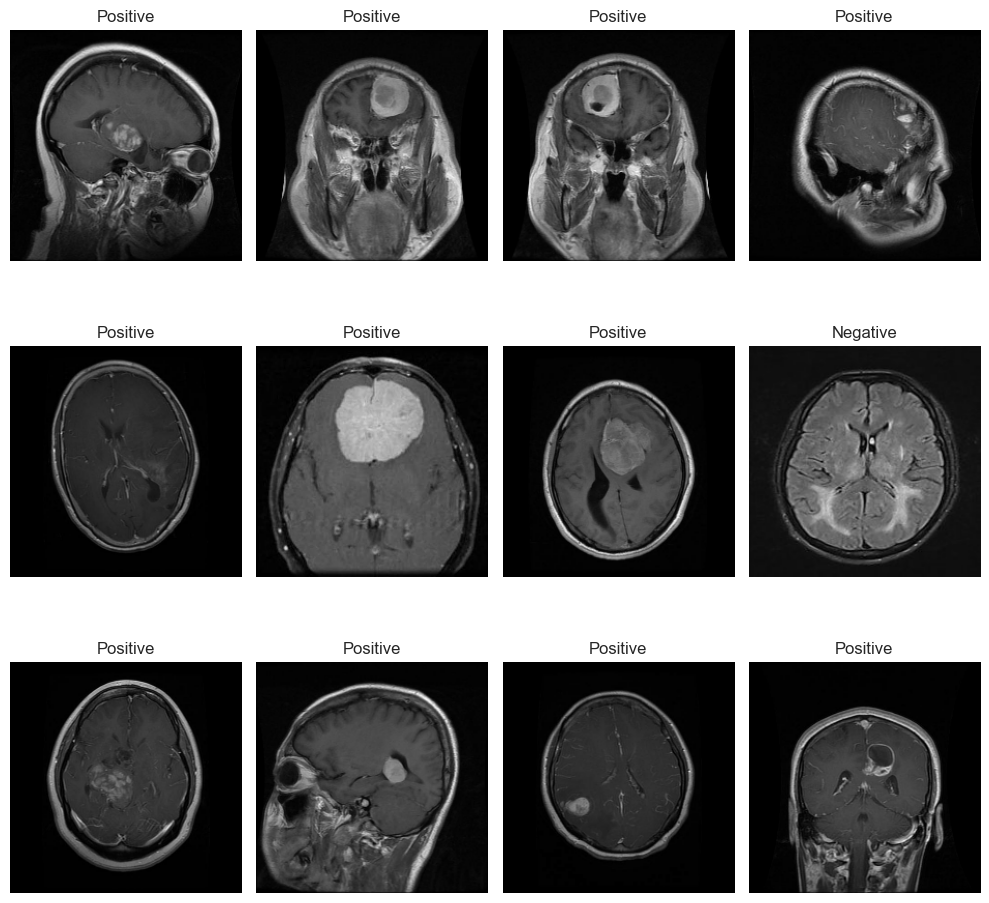

In [22]:
import pandas as pd

# creat a data set

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    labels="inferred",
    label_mode="int",          # 0,1
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

# images


plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(classes[label_batch[i]])
        plt.axis("off")
plt.tight_layout()
plt.show()


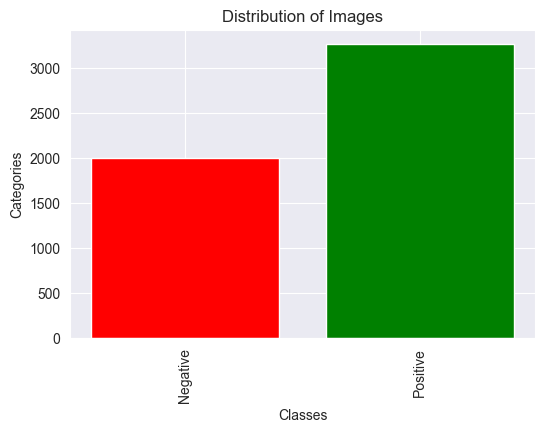

In [23]:
# category
class_names = dataset.class_names

# count images for class

counts = {class_name: len(os.listdir(os.path.join(DATA_DIR, class_name)))
          for class_name in class_names}

# plot in label

plt.figure(figsize=(6,4))
plt.bar(counts.keys(), counts.values(), color=["red", "green"])
plt.title("Distribution of Images")
plt.xlabel("Classes")
plt.ylabel("Categories")
plt.xticks(rotation=90)
plt.show()
plt.show()




In [32]:
# pre processing


AUTOTUNE = tf.data.AUTOTUNE

train_ds = dataset.map(lambda x, y: (x/255.0, y))
val_ds = val_ds.map(lambda x, y: (x/255.0, y))

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [36]:
# definition cnn

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')   # saída binária
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)